In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime


In [2]:
pwd

'/Users/jennychan/Desktop/Data Science Capstone'

In [150]:
US_raw = pd.read_csv("US_final.csv")
US_raw = US_raw.drop(["id","Unnamed: 0","changed","year","place","Country"],axis=1)
US_raw['created_at'] = pd.to_datetime(US_raw['created_at'])
US_raw['created_at'] = US_raw['created_at'].dt.date

In [151]:
US_raw

,created_at,sentiment score
0,2020-04-06,0.000000
1,2020-04-06,0.000000
2,2020-04-06,0.000000
3,2020-04-06,0.136364
4,2020-04-06,0.000000
...,...,...
178045,2022-06-11,0.150000
178046,2022-06-11,0.000000
178047,2022-06-12,0.437500
178048,2022-06-11,0.011111


In [157]:
US_df = pd.read_csv("US_final.csv")

In [158]:
US_df["sentiment score"].isna().sum() #2843 missing values

2843

In [159]:
len(US_df[US_df["sentiment score"]==0]) #54111 tweets with sentiment score = 0

54411

In [160]:
len(US_df)

178050

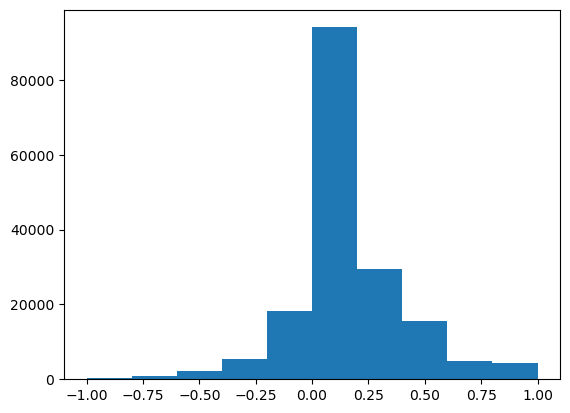

In [161]:
#Histogram with 0
plt.hist(US_df["sentiment score"])
plt.show()

In [162]:
US_df= US_df[US_df['sentiment score'] != 0] #drop 0 sentiment scores

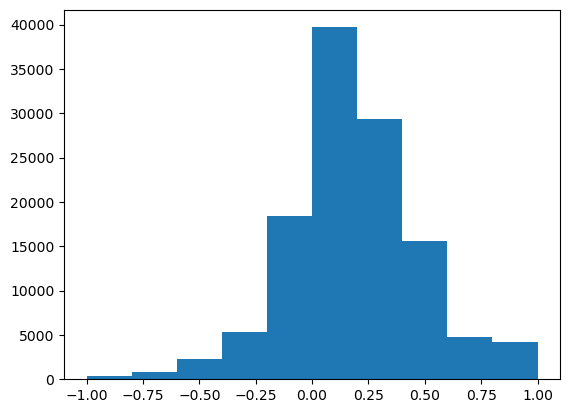

In [163]:
#Histogram without 0s
plt.hist(US_df["sentiment score"])
plt.show()

In [164]:
US_df = US_df.drop(["id","Unnamed: 0","changed","year","place","Country"],axis=1)

In [165]:
US_df['created_at'] = pd.to_datetime(US_df['created_at'])

In [166]:
US_df['created_at'] = US_df['created_at'].dt.date

In [167]:
US_df

,created_at,sentiment score
3,2020-04-06,0.136364
5,2020-04-06,0.400000
6,2020-04-06,-0.375000
7,2020-04-06,0.387500
9,2020-04-06,-0.031818
...,...,...
178043,2022-06-11,0.575000
178045,2022-06-11,0.150000
178047,2022-06-12,0.437500
178048,2022-06-11,0.011111


In [124]:
"""Count how many tweets per day"""
a=US_df.groupby("created_at").size().values
count= US_df.drop_duplicates(subset="created_at").assign(Count=a)
count = count.sort_values(by='created_at').drop(columns = ["sentiment score"])
count

,created_at,Count
73936,2020-03-19,164
74038,2020-03-20,139
29665,2020-03-21,416
29992,2020-03-22,379
34154,2020-03-23,444
...,...,...
170365,2022-09-26,26
170370,2022-09-27,30
170372,2022-09-28,29
170812,2022-09-29,16


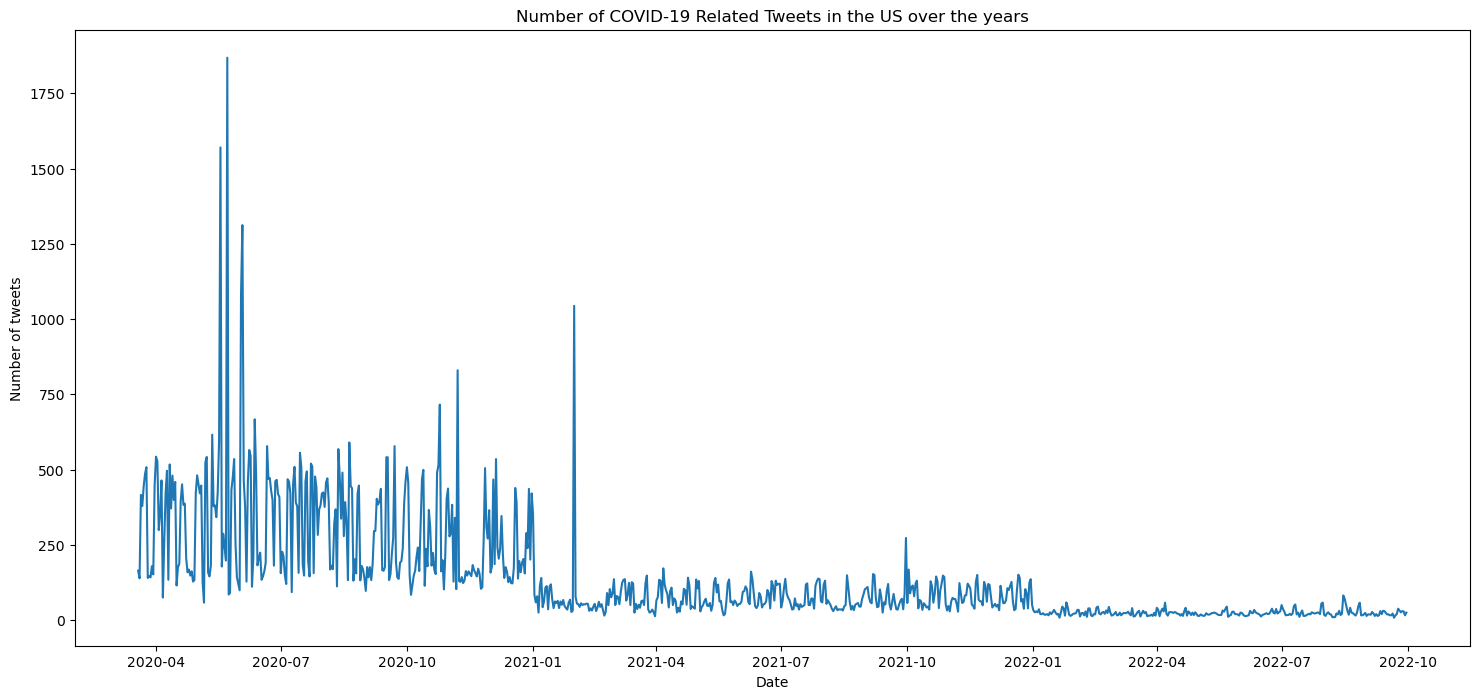

In [134]:
plt.subplots(figsize=(18, 8))
plt.plot(count["created_at"],count["Count"])
plt.xlabel('Date')
plt.ylabel("Number of tweets")
plt.title("Number of COVID-19 Related Tweets in the US over the years")
plt.show()

In [144]:
count.sort_values(by="Count", ascending = False)[:10]

,created_at,Count
1853,2020-05-23,1868
16271,2020-05-18,1570
17311,2020-06-03,1312
17111,2020-06-02,1079
130049,2021-01-31,1044
2056,2020-11-07,830
41218,2020-10-25,716
45471,2020-06-12,667
9402,2020-05-12,616
15863,2020-05-17,594


In [139]:
np.mean(count["Count"])

133.51943844492442

In [193]:
#count number of positive+negative+neutral over time
US_raw_sort = US_raw.sort_values(by="created_at")
US_raw_sort["created_at"]= pd.to_datetime(US_raw_sort["created_at"])
US_raw_sort

,created_at,sentiment score
74018,2020-03-19,0.000000
74033,2020-03-19,0.556463
74032,2020-03-19,-0.187500
74031,2020-03-19,-0.200000
74030,2020-03-19,0.080556
...,...,...
175330,2022-09-30,0.000000
175317,2022-09-30,-0.050000
169685,2022-09-30,0.937500
169650,2022-09-30,0.000000


In [194]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [195]:
"""Categorize tweets base on sentiment score"""
US_raw_sort['Analysis'] = US_raw_sort['sentiment score'].apply(analysis)
US_raw_sort.head()

,created_at,sentiment score,Analysis
74018,2020-03-19,0.000000,Neutral
74033,2020-03-19,0.556463,Positive
74032,2020-03-19,-0.187500,Negative
74031,2020-03-19,-0.200000,Negative
74030,2020-03-19,0.080556,Positive


Positive    96590
Neutral     54411
Negative    27049
Name: Analysis, dtype: int64


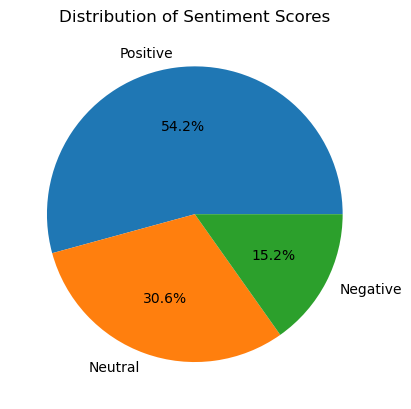

In [205]:
distribution = US_raw_sort.Analysis.value_counts()
print(distribution)
plt.pie(distribution, labels = ["Positive", "Neutral","Negative"],autopct='%1.1f%%')
plt.title("Distribution of Sentiment Scores")
plt.show() 

In [239]:
month = US_raw_sort.groupby(by=[US_raw_sort["created_at"].dt.year,US_raw_sort["created_at"].dt.month])['sentiment score'].mean()
month = pd.DataFrame(month)
month

sentiment score
created_at created_at                 
2020       3                  0.120009
           4                  0.131261
           5                  0.131038
           6                  0.138413
           7                  0.145806
           8                  0.148207
           9                  0.138633
           10                 0.132879
           11                 0.135336
           12                 0.127343
2021       1                  0.128499
           2                  0.131822
           3                  0.123526
           4                  0.126083
           5                  0.157560
           6                  0.137529
           7                  0.107627
           8                  0.100918
           9                  0.100784
           10                 0.110879
           11                 0.119137
           12                 0.089618
2022       1                  0.092931
           2                  0.122889
           3                  0.099876
           4                  0.092829
           5                  0.102273
           6                  0.105490
           7                  0.088504
           8                  0.086706
           9                  0.096210
           10                 0.000000

In [188]:
#March 19: California announced state-wide stay-at-home policy (first state mandate in the US)
len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2020-03-19') & (US_raw_sort["sentiment score"]>0)])

55

In [221]:
#November 18, 2021: The U.S. announced the End of Travel Ban
print(len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2022-01-01') & (US_raw_sort["sentiment score"]>0)]))
print(len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2022-01-01') & (US_raw_sort["sentiment score"]==0)]))
print(len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2022-01-01') & (US_raw_sort["sentiment score"]<0)]))

66
30
13


In [222]:
#December 31, 2021: End of Travel Ban
print(len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2021-12-31') & (US_raw_sort["sentiment score"]>0)]))
print(len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2021-12-31') & (US_raw_sort["sentiment score"]==0)]))
print(len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2021-12-31') & (US_raw_sort["sentiment score"]<0)]))

44
44
15


In [224]:
#December 31, 2021: End of Travel Ban
print(len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2021-12-30') & (US_raw_sort["sentiment score"]>0)]))
print(len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2021-12-30') & (US_raw_sort["sentiment score"]==0)]))
print(len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2021-12-30') & (US_raw_sort["sentiment score"]<0)]))

45
43
17


In [223]:
#December 31, 2021: End of Travel Ban
print(len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2022-01-01') & (US_raw_sort["sentiment score"]>0)]))
print(len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2022-01-01') & (US_raw_sort["sentiment score"]==0)]))
print(len(US_raw_sort.loc[(US_raw_sort["created_at"] == '2022-01-01') & (US_raw_sort["sentiment score"]<0)]))

66
30
13


In [243]:
final_US = US_df.groupby(US_df['created_at']).mean()
final_US.sort_values(by="sentiment score", ascending=False)[:10] #no negative mean sentiment score

,sentiment score
created_at,
2022-08-29,0.388183
2021-11-26,0.376153
2022-07-05,0.375968
2022-06-19,0.370644
2020-04-13,0.352183
2022-04-16,0.333546
2022-06-17,0.332794
2022-02-14,0.330045
2020-04-12,0.329070


In [72]:
"""This dataframe counts the number of tweets and shows the average sentiment score per day"""
US_count_sentiment = pd.merge(count, final_US, on='created_at')
US_count_sentiment

,created_at,Count,sentiment score
0,2020-03-19,164,0.156021
1,2020-03-20,139,0.156486
2,2020-03-21,416,0.199657
3,2020-03-22,379,0.174523
4,2020-03-23,444,0.187917
...,...,...,...
921,2022-09-26,26,0.188931
922,2022-09-27,30,0.208211
923,2022-09-28,29,0.106275
924,2022-09-29,16,0.270085


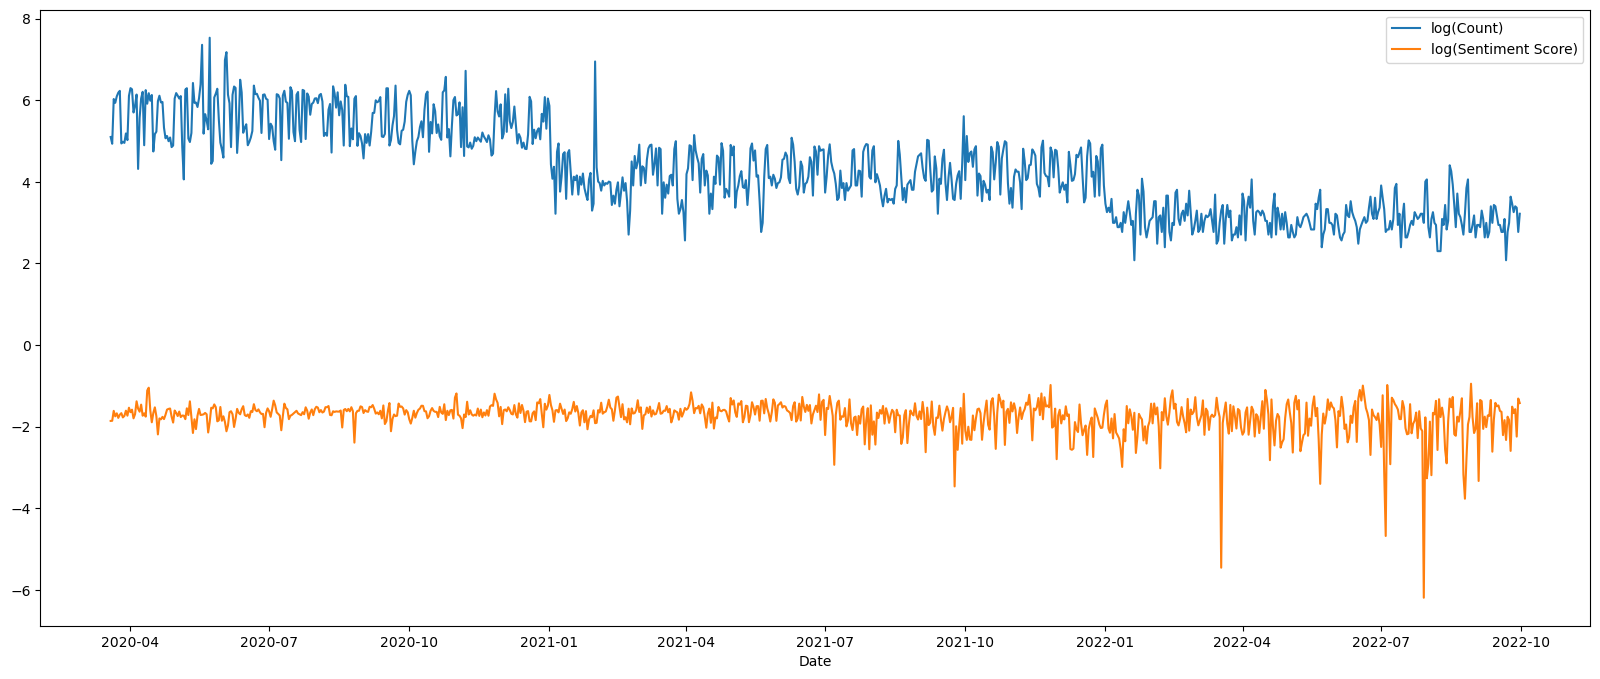

In [73]:
count = US_count_sentiment["Count"]
sentiment = US_count_sentiment["sentiment score"]
date = US_count_sentiment["created_at"]

plt.subplots(figsize=(20, 8))
plt.plot(date, np.log(count), label = "log(Count)")
plt.plot(date, np.log(sentiment),label = "log(Sentiment Score)")
plt.xlabel('Date')
plt.legend()
plt.show()

In [74]:
final_US.to_csv("date-sentiment-US.csv")

In [75]:
final_US.reset_index(inplace=True)
final_US = final_US.rename(columns = {'index':'Date'})

In [76]:
date = pd.to_datetime(final_US['created_at'])
sentiment_score = final_US['sentiment score']

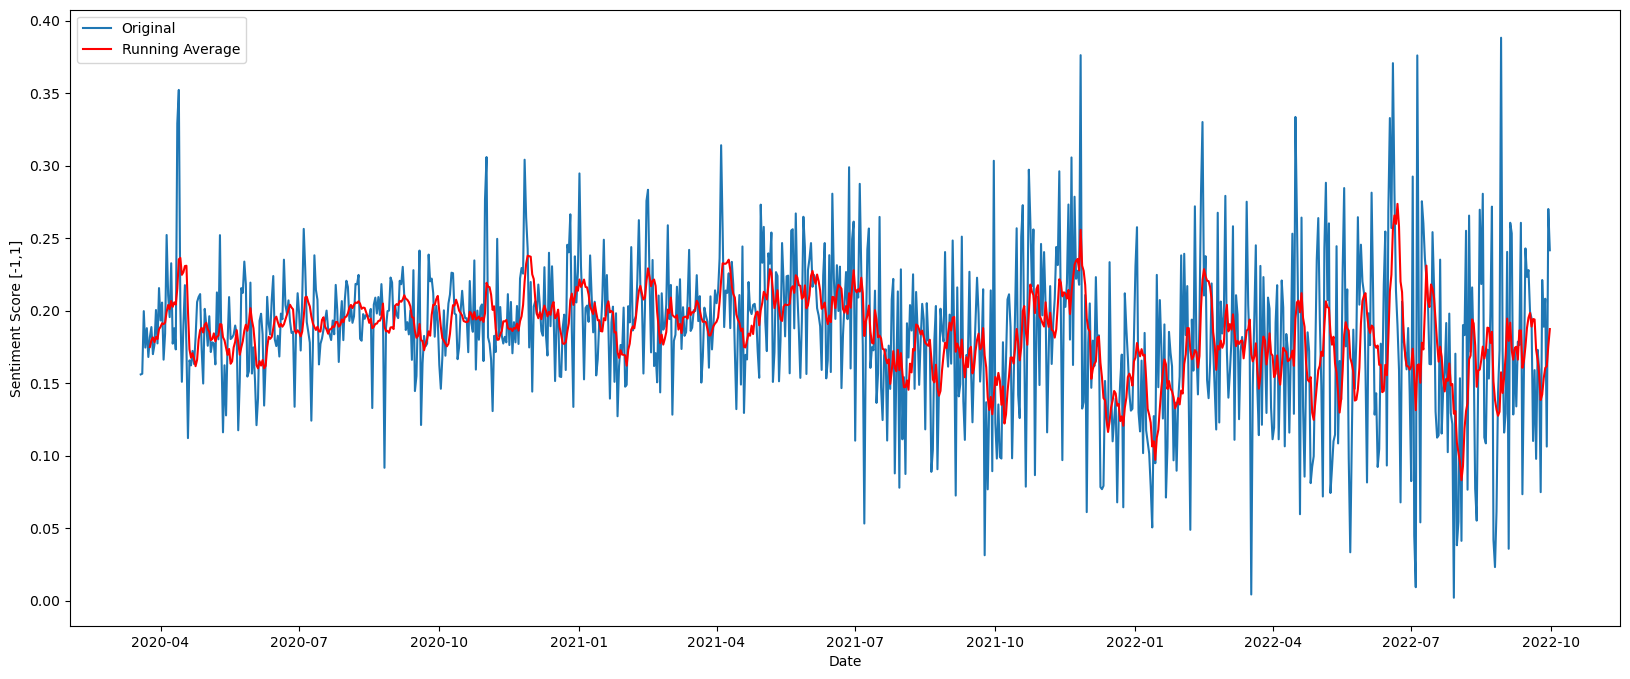

<Figure size 640x480 with 0 Axes>

In [77]:
fig, ax = plt.subplots(figsize=(20, 8))

half_year_locator = mdates.MonthLocator(interval=3)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

#moving average
average = sentiment_score.rolling(window=7).mean()

plt.plot(date, sentiment_score, label='Original')
plt.plot(date, average, 'red', label='Running Average')

#labels
plt.ylabel('Sentiment Score [-1,1]')
plt.xlabel('Date')
#plt.grid(linestyle=':')
#plt.legend(loc='upper left')
#plt.show()

#ax.plot(date, sentiment_score);
plt.legend()
plt.show()
plt.savefig('US_sentiment_score.png')